Gambling Data in NSW
By Berny Yan
Github Account- BY-2224

In [168]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

data setup:

In [169]:
%matplotlib inline

In [170]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

CSV file of the gaming data

In [171]:
gaming_data = pd.read_csv("clubs-gaming-machine-report-by-lga.csv")
print("done")

done


In [172]:
gaming_data.head()

,LGA,Profit,Tax,Machines,Premises Count
0,Albury\r\nGreater Hume,24405524,5266934,850,8
1,Armidale\r\nGlen Innes Severn,5778231,788695,267,7
2,Ballina,8496734,1451539,383,7
3,Balranald\r\nCarrathool\r\nCentral Darling,4840075,744971,202,6
4,Bathurst\r\nBlayney,5356026,894190,275,7


Columns of the gaming data

In [173]:
gaming_data.columns

Index(['LGA', 'Profit', 'Tax', 'Machines', 'Premises Count'], dtype='object')

row of the gaming data

In [174]:
row_one = gaming_data.iloc[1]
row_one

LGA               Armidale\r\nGlen Innes Severn
Profit                                  5778231
Tax                                      788695
Machines                                    267
Premises Count                                7
Name: 1, dtype: object

In [175]:
row_one["Tax"]


'788695'

In [176]:
row_two = gaming_data.iloc[9]
row_two

LGA               Blacktown
Profit             37381922
Tax                 7812098
Machines               2079
Premises Count           11
Name: 9, dtype: object

In [177]:
row_two["Tax"]

'7812098'

In [178]:
gaming_data.head(3)

,LGA,Profit,Tax,Machines,Premises Count
0,Albury\r\nGreater Hume,24405524,5266934,850,8
1,Armidale\r\nGlen Innes Severn,5778231,788695,267,7
2,Ballina,8496734,1451539,383,7


In [179]:
gaming_data.describe()

,Profit,Machines,Premises Count
count,9.500000e+01,95.000000,95.000000
mean,1.180606e+07,681.789474,10.863158
std,1.464486e+07,761.533069,6.967417
min,1.149520e+05,42.000000,5.000000
25%,2.917159e+06,181.000000,7.000000
50%,7.054930e+06,385.000000,9.000000
75%,1.432903e+07,878.500000,12.000000
max,8.867264e+07,3852.000000,36.000000


In [180]:
print(gaming_data.LGA)

0                         Albury\r\nGreater Hume
1                  Armidale\r\nGlen Innes Severn
2                                        Ballina
3     Balranald\r\nCarrathool\r\nCentral Darling
4                            Bathurst\r\nBlayney
                         ...                    
90                                  Warrumbungle
91                                      Waverley
92                                 Wingecarribee
93                                   Wollondilly
94                                    Wollongong
Name: LGA, Length: 95, dtype: object


In [181]:
gaming_data['Machines'].value_counts()

279     2
237     2
850     1
1224    1
300     1
       ..
139     1
177     1
93      1
80      1
2156    1
Name: Machines, Length: 93, dtype: int64

In [182]:
gaming_data["Premises Count"].value_counts()

7     16
5     13
6     10
11     8
9      8
8      7
10     7
12     5
15     5
14     2
23     2
28     2
29     2
13     2
18     2
33     1
36     1
20     1
35     1
Name: Premises Count, dtype: int64

In [183]:
gaming_data.sort_values("Tax")

,LGA,Profit,Tax,Machines,Premises Count
51,Kyogle,114952,-,42,5
90,Warrumbungle,664337,-,96,10
42,Gwydir\r\nUralla\r\nWalcha,952863,-,95,10
16,Cabonne,871085,-,92,11
12,Bogan\r\nBourke\r\nBrewarrina,1910027,103516,85,5
...,...,...,...,...,...
4,Bathurst\r\nBlayney,5356026,894190,275,7
91,Waverley,4885521,912744,369,6
22,Cessnock,7508814,916725,533,12
6,Bega Valley,7721981,920028,488,11


In [184]:
clubs_no1=gaming_data.sort_values(["Premises Count","LGA"],ascending=[True,False]).head(5)
clubs_no1

,LGA,Profit,Tax,Machines,Premises Count
93,Wollondilly,841053,24090,167,5
70,Orange,7945998,1497765,300,5
64,Muswellbrook,3831844,540037,170,5
62,Mosman\r\nNorth Sydney,5158368,852954,381,5
51,Kyogle,114952,-,42,5


In [185]:
x1_axis=clubs_no1.iloc[:,0]
x1_axis

93               Wollondilly
70                    Orange
64              Muswellbrook
62    Mosman\r\nNorth Sydney
51                    Kyogle
Name: LGA, dtype: object

In [186]:
y1_axis=clubs_no1.iloc[:,4]
y1_axis

93    5
70    5
64    5
62    5
51    5
Name: Premises Count, dtype: int64

) missing from current font.al\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


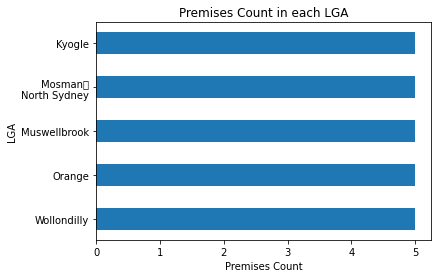

In [187]:
plt.barh(x1_axis,y1_axis,height=0.5)
plt.ylabel('LGA')
plt.xlabel('Premises Count')
plt.title('Premises Count in each LGA')
plt.show()


In [188]:
profit1=clubs_no1.iloc[:,1]
profit1

93     841053
70    7945998
64    3831844
62    5158368
51     114952
Name: Profit, dtype: int64

Profit of the least number of clubs in each LGA

Text(0.5, 1.0, 'Profits in each LGA')

) missing from current font.al\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


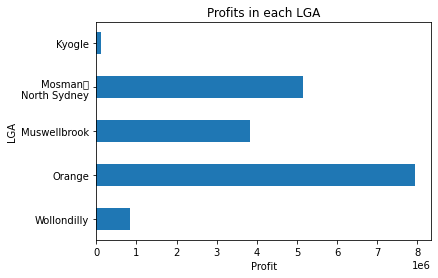

In [189]:
plt.barh(x1_axis,profit1, height=0.5)
plt.ylabel('LGA')
plt.xlabel('Profit')
plt.title('Profits in each LGA')



In [190]:
tax1=clubs_no1.iloc[:,2]
tax1


93      24090
70    1497765
64     540037
62     852954
51       -   
Name: Tax, dtype: object

<BarContainer object of 5 artists>

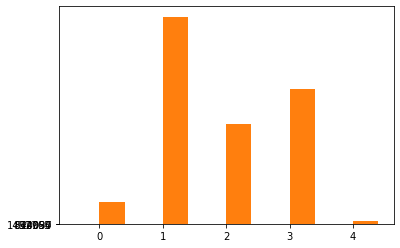

In [191]:
y2_axis=np.arange(len(x1_axis))
plt.bar(y2_axis-0.2, tax1, width=0.4)
plt.bar(y2_axis+0.2,profit1,width=0.4)



In [192]:
club_no=gaming_data.sort_values("Premises Count",ascending=False).head(10)
club_no

,LGA,Profit,Tax,Machines,Premises Count
21,Central Coast,48423291,7556742,3587,36
94,Wollongong,26318771,3687584,2156,35
52,Lake Macquarie,26199449,3592350,1858,33
68,Newcastle,31846408,5836602,1937,29
20,Canterbury-Bankstown,79269903,16630822,3852,29
59,Mid-Coast,18877112,2298974,1076,28
69,Northern Beaches,22138516,3764853,1691,28
81,Shoalhaven,23408835,3214255,1387,23
84,Sutherland,18523923,2666112,1512,23
77,Randwick\r\nWoollahra,12315949,2001249,973,20


In [193]:
x_axis=club_no.iloc[:,0]
x_axis

21            Central Coast
94               Wollongong
52           Lake Macquarie
68                Newcastle
20     Canterbury-Bankstown
59                Mid-Coast
69         Northern Beaches
81               Shoalhaven
84               Sutherland
77    Randwick\r\nWoollahra
Name: LGA, dtype: object

In [194]:
y_axis=club_no.iloc[:,4]
y_axis

21    36
94    35
52    33
68    29
20    29
59    28
69    28
81    23
84    23
77    20
Name: Premises Count, dtype: int64

Number of clubs in each LGA

) missing from current font.al\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


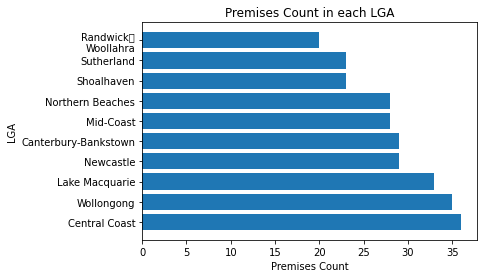

In [195]:
plt.barh(x_axis,y_axis)
plt.xlabel('Premises Count')
plt.ylabel('LGA')
plt.title('Premises Count in each LGA')
plt.show()

Frequency of the numbers of clubs in LGA specified

Text(0.5, 0, 'No. of clubs in each LGA')

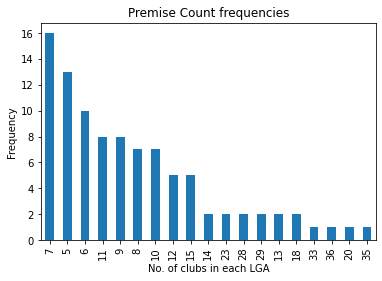

In [196]:
gaming_data["Premises Count"].value_counts().plot(kind="bar")
plt.title("Premise Count frequencies")
plt.ylabel('Frequency')
plt.xlabel('No. of clubs in each LGA')

In [197]:
gaming_data.sort_values(["Machines","Profit"]).head(30)

,LGA,Profit,Tax,Machines,Premises Count
51,Kyogle,114952,-,42,5
26,Coolamon\r\nJunee,903605,73140,80,5
10,Bland,803322,69525,84,6
12,Bogan\r\nBourke\r\nBrewarrina,1910027,103516,85,5
16,Cabonne,871085,-,92,11
27,Coonamble\r\nGilgandra,1890093,192519,93,5
42,Gwydir\r\nUralla\r\nWalcha,952863,-,95,10
90,Warrumbungle,664337,-,96,10
37,Forbes\r\nWeddin,1348110,136600,102,5
67,Narromine\r\nWarren,1513657,63899,120,7


In [198]:
gaming_data.sort_values(["Machines","Profit"],ascending=False).head(30)

,LGA,Profit,Tax,Machines,Premises Count
20,Canterbury-Bankstown,79269903,16630822,3852,29
21,Central Coast,48423291,7556742,3587,36
35,Fairfield,88672639,19383104,3350,18
94,Wollongong,26318771,3687584,2156,35
30,Cumberland,49016515,10368576,2134,14
73,Penrith,28241433,5189827,2082,15
9,Blacktown,37381922,7812098,2079,11
68,Newcastle,31846408,5836602,1937,29
52,Lake Macquarie,26199449,3592350,1858,33
69,Northern Beaches,22138516,3764853,1691,28


Machines vs Profit Graph

Text(0.5, 1.0, 'Machines vs Profit')

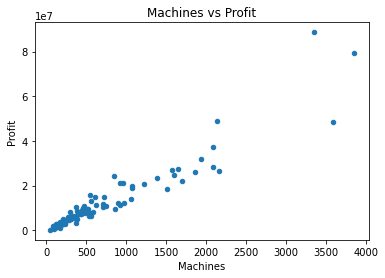

In [199]:
gaming_data.plot(kind='scatter', x= 'Machines', y= 'Profit')
plt.title('Machines vs Profit')


Premises Count vs Machines Graph

Text(0.5, 1.0, 'Premises Count vs Machines')

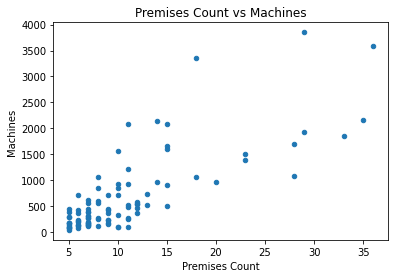

In [200]:
gaming_data.plot(kind='scatter', x='Premises Count', y='Machines')
plt.title('Premises Count vs Machines')